In [1]:
import torch
import torch.nn as nn

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../Data/NYCTaxiFares.csv')
df.head()

,pickup_datetime,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2010-04-19 08:17:56 UTC,6.5,0,-73.992365,40.730521,-73.975499,40.744746,1
1,2010-04-17 15:43:53 UTC,6.9,0,-73.990078,40.740558,-73.974232,40.744114,1
2,2010-04-17 11:23:26 UTC,10.1,1,-73.994149,40.751118,-73.960064,40.766235,2
3,2010-04-11 21:25:03 UTC,8.9,0,-73.990485,40.756422,-73.971205,40.748192,1
4,2010-04-17 02:19:01 UTC,19.7,1,-73.990976,40.734202,-73.905956,40.743115,1


## przejechana odległość

[Wzór haversine](https://en.wikipedia.org/wiki/Haversine_formula) wyznacza odległość na kuli pomiędzy dwiema parami współrzędnych GPS.  

Szerokość geograficzną oznaczymy przez $\varphi$ (phi), a długość przez $\lambda$ (lambda).

Wzór przyjmuje postać:

$$
d = 2r \arcsin \left( 
    \sqrt{ 
        \sin^2\!\left(\frac{\varphi_2 - \varphi_1}{2}\right) 
        + \cos(\varphi_1)\cos(\varphi_2)\sin^2\!\left(\frac{\lambda_2 - \lambda_1}{2}\right) 
    } 
\right)
$$

przy czym:

$$
\begin{aligned}
r & : \text{ promień kuli (średni promień Ziemi to 6371 km)} \\
\varphi_1, \varphi_2 & : \text{ szerokości geograficzne punktów 1 i 2} \\
\lambda_1, \lambda_2 & : \text{ długości geograficzne punktów 1 i 2} \\
\end{aligned}
$$


In [4]:
df.columns

Index(['pickup_datetime', 'fare_amount', 'fare_class', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'passenger_count'],
      dtype='object')

In [9]:
def haversine_distance(df, lat_p="pickup_latitude", long_p = "pickup_longitude", lat_d="dropoff_latitude", long_d="dropoff_longitude"):
    r = 6371
    phi1 = np.radians(df[lat_p])
    phi2 = np.radians(df[lat_d])

    delta_phi  = phi2 - phi1
    delta_lambda = np.radians(df[long_d] - df[long_p])

    a = np.sin(delta_phi/2) ** 2 + np.cos(phi1) * np.cos(phi2) * np.sin(delta_lambda / 2) ** 2
    d = 2 * r * np.arcsin(np.sqrt(a))

    return d
     

In [11]:
df["dist_km"] = haversine_distance(df)

In [12]:
df.head()

,pickup_datetime,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,dist_km
0,2010-04-19 08:17:56 UTC,6.5,0,-73.992365,40.730521,-73.975499,40.744746,1,2.126312
1,2010-04-17 15:43:53 UTC,6.9,0,-73.990078,40.740558,-73.974232,40.744114,1,1.392307
2,2010-04-17 11:23:26 UTC,10.1,1,-73.994149,40.751118,-73.960064,40.766235,2,3.326763
3,2010-04-11 21:25:03 UTC,8.9,0,-73.990485,40.756422,-73.971205,40.748192,1,1.864129
4,2010-04-17 02:19:01 UTC,19.7,1,-73.990976,40.734202,-73.905956,40.743115,1,7.231321


In [17]:
df["EDTdate"] = pd.to_datetime(df.pickup_datetime).dt.tz_convert("US/Eastern")

In [23]:
df["AMorPM"] = np.where(df.EDTdate.dt.hour < 12, "am", "pm")

In [24]:
df.head()

,pickup_datetime,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,dist_km,EDTdate,AMorPM
0,2010-04-19 08:17:56 UTC,6.5,0,-73.992365,40.730521,-73.975499,40.744746,1,2.126312,2010-04-19 04:17:56-04:00,am
1,2010-04-17 15:43:53 UTC,6.9,0,-73.990078,40.740558,-73.974232,40.744114,1,1.392307,2010-04-17 11:43:53-04:00,am
2,2010-04-17 11:23:26 UTC,10.1,1,-73.994149,40.751118,-73.960064,40.766235,2,3.326763,2010-04-17 07:23:26-04:00,am
3,2010-04-11 21:25:03 UTC,8.9,0,-73.990485,40.756422,-73.971205,40.748192,1,1.864129,2010-04-11 17:25:03-04:00,pm
4,2010-04-17 02:19:01 UTC,19.7,1,-73.990976,40.734202,-73.905956,40.743115,1,7.231321,2010-04-16 22:19:01-04:00,pm


<Axes: >

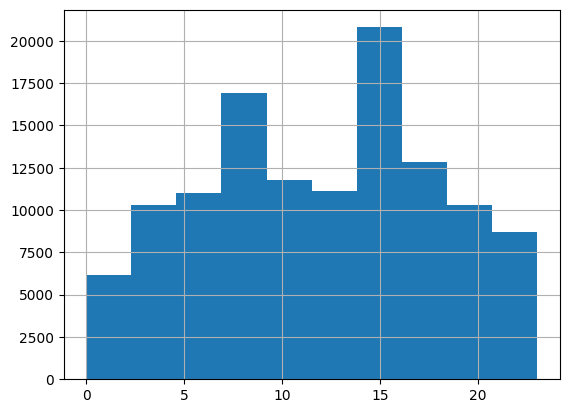

In [28]:
df.EDTdate.dt.hour.hist()

In [29]:
df["Hour"] = df.EDTdate.dt.hour

In [32]:
df["Weekday"] = df.EDTdate.dt.strftime("%a")


In [34]:
df.columns

Index(['pickup_datetime', 'fare_amount', 'fare_class', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'passenger_count', 'dist_km', 'EDTdate', 'AMorPM', 'Hour', 'Weekday'],
      dtype='object')

In [33]:
# dzielimy na zmienne kategoryczne i ciagle

In [69]:
cat_cols = ["Hour", "AMorPM", "Weekday"]
dropoff_cols = ["pickup_datetime", "EDTdate", "fare_class"]
y = ["fare_amount"]
cont_cols = list(df.columns)
cont_cols = [col for col in cont_cols if col not in cat_cols + dropoff_cols + y]
cont_cols

['pickup_longitude',
 'pickup_latitude',
 'dropoff_longitude',
 'dropoff_latitude',
 'passenger_count',
 'dist_km']

In [70]:
df.dtypes

pickup_datetime                          object
fare_amount                             float64
fare_class                                int64
pickup_longitude                        float64
pickup_latitude                         float64
dropoff_longitude                       float64
dropoff_latitude                        float64
passenger_count                           int64
dist_km                                 float64
EDTdate              datetime64[ns, US/Eastern]
AMorPM                                 category
Hour                                   category
Weekday                                category
dtype: object

In [71]:
for cat in cat_cols:
    df[cat] = df[cat].astype("category")

In [72]:
df.dtypes

pickup_datetime                          object
fare_amount                             float64
fare_class                                int64
pickup_longitude                        float64
pickup_latitude                         float64
dropoff_longitude                       float64
dropoff_latitude                        float64
passenger_count                           int64
dist_km                                 float64
EDTdate              datetime64[ns, US/Eastern]
AMorPM                                 category
Hour                                   category
Weekday                                category
dtype: object

In [73]:
df.Hour.cat.codes

0          4
1         11
2          7
3         17
4         22
          ..
119995    10
119996     6
119997    14
119998     4
119999    12
Length: 120000, dtype: int8

In [74]:
hr = df["Hour"].cat.codes.values

In [75]:
ampm = df["AMorPM"].cat.codes.values
wkdy = df["Weekday"].cat.codes.values

In [76]:
cats = np.stack([hr, ampm, wkdy], 1)

In [77]:
cats

array([[ 4,  0,  1],
       [11,  0,  2],
       [ 7,  0,  2],
       ...,
       [14,  1,  3],
       [ 4,  0,  5],
       [12,  1,  2]], dtype=int8)

In [78]:
cats = torch.tensor(cats, dtype=torch.int64)

In [79]:
cats

tensor([[ 4,  0,  1],
        [11,  0,  2],
        [ 7,  0,  2],
        ...,
        [14,  1,  3],
        [ 4,  0,  5],
        [12,  1,  2]])

In [80]:
conts = np.stack([df[col].values for col in cont_cols], 1)
conts = torch.tensor(conts, dtype=torch.float)
conts

tensor([[-73.9924,  40.7305, -73.9755,  40.7447,   1.0000,   2.1263],
        [-73.9901,  40.7406, -73.9742,  40.7441,   1.0000,   1.3923],
        [-73.9941,  40.7511, -73.9601,  40.7662,   2.0000,   3.3268],
        ...,
        [-73.9886,  40.7498, -74.0115,  40.7078,   3.0000,   5.0525],
        [-74.0044,  40.7245, -73.9927,  40.7308,   1.0000,   1.2089],
        [-73.9554,  40.7719, -73.9676,  40.7630,   3.0000,   1.4274]])

In [81]:
y = torch.tensor(df["fare_amount"].values, dtype=torch.float).reshape(-1, 1)
y

tensor([[ 6.5000],
        [ 6.9000],
        [10.1000],
        ...,
        [12.5000],
        [ 4.9000],
        [ 5.3000]])

In [82]:
cats.shape

torch.Size([120000, 3])

In [83]:
conts

tensor([[-73.9924,  40.7305, -73.9755,  40.7447,   1.0000,   2.1263],
        [-73.9901,  40.7406, -73.9742,  40.7441,   1.0000,   1.3923],
        [-73.9941,  40.7511, -73.9601,  40.7662,   2.0000,   3.3268],
        ...,
        [-73.9886,  40.7498, -74.0115,  40.7078,   3.0000,   5.0525],
        [-74.0044,  40.7245, -73.9927,  40.7308,   1.0000,   1.2089],
        [-73.9554,  40.7719, -73.9676,  40.7630,   3.0000,   1.4274]])

In [84]:
conts.shape

torch.Size([120000, 6])